<a href="https://colab.research.google.com/github/prititaliya/Predict-the-Introverts-from-the-Extroverts/blob/main/Predict_the_Introverts_from_the_Extroverts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
!pip install keras-tuner
import keras_tuner as kt

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')
validation=pd.read_csv('/content/validation.csv')
test_id=pd.read_csv('/content/test_ids.csv')

In [7]:
train

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,na_Time_spent_alone,na_Social_event_attendance,na_Going_outside,na_Friends_circle_size,na_Post_frequency,Stage_fear_Unkknown,Stage_fear_Yes,Drained_after_socializing_Unknown,Drained_after_socializing_Yes,Personality
0,0.0,6.0,4.0,15.0,5.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
1,1.0,7.0,3.0,10.0,8.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
2,6.0,1.0,0.0,3.0,0.0,0,0,0,0,0,0.0,1.0,1.0,0.0,1
3,3.0,7.0,3.0,11.0,5.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4,1.0,4.0,4.0,13.0,-1.0,0,0,0,0,1,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
18520,1.0,6.0,7.0,6.0,5.0,0,0,0,0,0,1.0,0.0,0.0,0.0,0
18521,7.0,1.0,1.0,1.0,-1.0,0,0,0,0,1,0.0,1.0,0.0,1.0,1
18522,-1.0,1.0,0.0,5.0,2.0,1,0,0,0,0,0.0,1.0,0.0,1.0,1


In [ ]:
test_id=pd.read_csv('/content/test_ids.csv')

In [ ]:
train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)
validation.drop('Unnamed: 0',axis=1,inplace=True)
test_id.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)
validation.to_csv('validation.csv',index=False)
test_id.to_csv('test_id.csv',index=False)

In [ ]:
class_name=['Extrovert','Introvert']

In [ ]:
validation.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
train_ids=train.pop('id')
test_ids=test.pop('id')

In [ ]:
y=train.pop('Personality')

In [ ]:
y.to_csv('y.csv')
train_ids.to_csv('train_ids.csv')
test_ids.to_csv('test_ids.csv')

In [ ]:
def preprocessing(df):
    df['Time_spent_Alone'].fillna(-1,inplace=True)
    df['Stage_fear'].fillna('Unkknown',inplace=True)
    df['Social_event_attendance'].fillna(-1,inplace=True)
    df['Going_outside'].fillna(-1,inplace=True)
    df['Drained_after_socializing'].fillna("Unknown",inplace=True)
    df['Friends_circle_size'].fillna(-1,inplace=True)
    df['Post_frequency'].fillna(-1,inplace=True)

def posprocessing(df):
    df['na_Time_spent_alone']=0
    df.loc[df['Time_spent_Alone']==-1,'na_Time_spent_alone']=1
    df['na_Social_event_attendance']=0
    df.loc[df['Social_event_attendance']==-1,'na_Social_event_attendance']=1
    df['na_Going_outside']=0
    df.loc[df['Going_outside']==-1,'na_Going_outside']=1
    df['na_Friends_circle_size']=0
    df.loc[df['Friends_circle_size']==-1,'na_Friends_circle_size']=1
    df['na_Post_frequency']=0
    df.loc[df['Post_frequency']==-1,'na_Post_frequency']=1

In [ ]:
train['Time_spent_Alone'].fillna(-1,inplace=True)
test['Time_spent_Alone'].fillna(-1,inplace=True)

In [ ]:
train[train['Time_spent_Alone']==-1]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
15,-1.0,No,7.0,6.0,No,5.0,8.0
29,-1.0,Yes,1.0,0.0,Yes,4.0,0.0
31,-1.0,No,4.0,NaN,No,11.0,5.0
41,-1.0,No,6.0,5.0,No,14.0,3.0
62,-1.0,No,6.0,6.0,No,13.0,4.0
...,...,...,...,...,...,...,...
18502,-1.0,No,4.0,5.0,No,15.0,6.0
18510,-1.0,No,NaN,5.0,No,12.0,9.0
18515,-1.0,No,9.0,4.0,No,5.0,8.0
18516,-1.0,No,6.0,5.0,No,9.0,4.0


In [ ]:
train['na_Time_spent_alone']=0
test['na_Time_spent_alone']=0

In [ ]:
train.loc[train['Time_spent_Alone']==-1,'na_Time_spent_alone']=1
test.loc[test['Time_spent_Alone']==-1,'na_Time_spent_alone']=1

In [ ]:
preprocessing(train)
preprocessing(test)

In [ ]:
preprocessing(train)
preprocessing(test)
posprocessing(train)
posprocessing(test)

In [ ]:
train

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,na_Time_spent_alone,na_Social_event_attendance,na_Going_outside,na_Friends_circle_size,na_Post_frequency,Stage_fear_Unkknown,Stage_fear_Yes,Drained_after_socializing_Unknown,Drained_after_socializing_Yes
0,0.0,6.0,4.0,15.0,5.0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1.0,7.0,3.0,10.0,8.0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,6.0,1.0,0.0,3.0,0.0,0,0,0,0,0,0.0,1.0,1.0,0.0
3,3.0,7.0,3.0,11.0,5.0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,1.0,4.0,4.0,13.0,-1.0,0,0,0,0,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18519,3.0,7.0,3.0,9.0,7.0,0,0,0,0,0,0.0,0.0,0.0,0.0
18520,1.0,6.0,7.0,6.0,5.0,0,0,0,0,0,1.0,0.0,0.0,0.0
18521,7.0,1.0,1.0,1.0,-1.0,0,0,0,0,1,0.0,1.0,0.0,1.0
18522,-1.0,1.0,0.0,5.0,2.0,1,0,0,0,0,0.0,1.0,0.0,1.0


In [ ]:
ohe_Stage_fear=OneHotEncoder(sparse_output=False,drop='first')
ohe_Stage_fear.fit(train[['Stage_fear']])
ohe_Stage_fear_train=ohe_Stage_fear.transform(train[['Stage_fear']])
ohe_Stage_fear_test=ohe_Stage_fear.transform(test[['Stage_fear']])

In [ ]:
ohe_Stage_fear_train=pd.DataFrame(ohe_Stage_fear_train,columns=ohe_Stage_fear.get_feature_names_out())
ohe_Stage_fear_test=pd.DataFrame(ohe_Stage_fear_test,columns=ohe_Stage_fear.get_feature_names_out())

In [ ]:
train=pd.concat([train,ohe_Stage_fear_train],axis=1)
test=pd.concat([test,ohe_Stage_fear_test],axis=1)

In [ ]:
train.drop('Stage_fear',axis=1,inplace=True)
test.drop('Stage_fear',axis=1,inplace=True)

In [ ]:
ohe_Drained_after_socializing=OneHotEncoder(sparse_output=False,drop='first')
ohe_Drained_after_socializing.fit(train[['Drained_after_socializing']])
ohe_Drained_after_socializing_train=ohe_Drained_after_socializing.transform(train[['Drained_after_socializing']])
ohe_Drained_after_socializing_test=ohe_Drained_after_socializing.transform(test[['Drained_after_socializing']])

In [ ]:
ohe_Drained_after_socializing_train=pd.DataFrame(ohe_Drained_after_socializing_train,columns=ohe_Drained_after_socializing.get_feature_names_out())
ohe_Drained_after_socializing_test=pd.DataFrame(ohe_Drained_after_socializing_test,columns=ohe_Drained_after_socializing.get_feature_names_out())

In [ ]:
train=pd.concat([train,ohe_Drained_after_socializing_train],axis=1)
test=pd.concat([test,ohe_Drained_after_socializing_test],axis=1)
train.drop('Drained_after_socializing',axis=1,inplace=True)
test.drop('Drained_after_socializing',axis=1,inplace=True)

In [ ]:
train.to_csv('train_preprocessed.csv')
test.to_csv('test_preprocessed.csv')

# imbalanced dataset

In [ ]:
y.value_counts()

,count
Personality,
0,13699
1,4825


In [ ]:
encoder=LabelEncoder()
y=encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y,columns=['Personality'])

In [ ]:
y.to_csv("y.csv")

In [ ]:
indexed_1=y[y['Personality']==1].index

In [ ]:
balancedy.iloc[indexed_1]

,Personality
2,1
8,1
17,1
21,1
22,1
...,...
18492,1
18500,1
18501,1
18521,1


In [ ]:
train=pd.concat([train,y],axis=1)

In [ ]:
train_majority=train[train['Personality']==0]
train_minority=train[train['Personality']==1]

In [ ]:
train_majority_downsampled=train_majority.sample(n=len(train_minority))

In [ ]:
sample=pd.concat([train_majority_downsampled,train_minority])

In [ ]:
sample_index=sample.index

In [ ]:
validation=train.drop(sample_index)

In [ ]:
train.to_csv('train.csv')
validation.to_csv('validation.csv')


In [ ]:
sample

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,na_Time_spent_alone,na_Social_event_attendance,na_Going_outside,na_Friends_circle_size,na_Post_frequency,Stage_fear_Unkknown,Stage_fear_Yes,Drained_after_socializing_Unknown,Drained_after_socializing_Yes,Personality
9895,0.0,8.0,7.0,14.0,8.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
3519,1.0,7.0,7.0,4.0,3.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
15081,1.0,5.0,7.0,14.0,4.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
5722,0.0,8.0,6.0,7.0,6.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
4772,2.0,5.0,4.0,11.0,9.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,6.0,0.0,2.0,3.0,0.0,0,0,0,0,0,0.0,1.0,0.0,1.0,1
18500,7.0,2.0,0.0,-1.0,2.0,0,0,0,1,0,0.0,1.0,0.0,1.0,1
18501,10.0,2.0,2.0,1.0,-1.0,0,0,0,0,1,0.0,1.0,0.0,1.0,1
18521,7.0,1.0,1.0,1.0,-1.0,0,0,0,0,1,0.0,1.0,0.0,1.0,1


In [ ]:
model=Sequential()

model.add(Dense(1024,activation='relu',input_dim=train.shape[1]-1))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(4,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1024)           │        15,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 723,601 (2.76 MB)

 Trainable params: 719,513 (2.74 MB)

 Non-trainable params: 4,088 (15.97 KB)

In [ ]:
history=model.fit(
    sample.drop('Personality',axis=1),
    sample['Personality'],
    validation_data=(validation.drop('Personality',axis=1),validation['Personality']),
    batch_size=128,
    epochs=100
)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9569 - loss: 0.1736 - val_accuracy: 0.9793 - val_loss: 0.1660
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9606 - loss: 0.1665 - val_accuracy: 0.9793 - val_loss: 0.1489
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9575 - loss: 0.1799 - val_accuracy: 0.9792 - val_loss: 0.1422
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9590 - loss: 0.1720 - val_accuracy: 0.9799 - val_loss: 0.1414
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9580 - loss: 0.1768 - val_accuracy: 0.9797 - val_loss: 0.1538
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9585 - loss: 0.1677 - val_accuracy: 0.9794 - val_loss: 0.1358
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9599 - loss: 0.1731 - val_accuracy: 0.9795 - val_loss: 0.1569
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9577 - loss: 0.1753 - val_accuracy: 0.979

Text(0.5, 0, 'epoch')

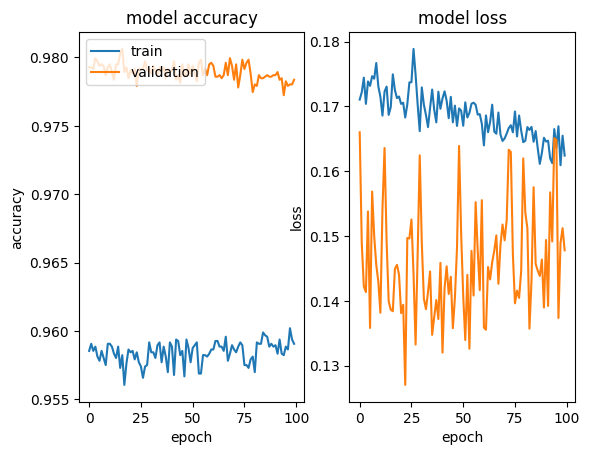

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],
           loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
y_preds=model.predict(test)

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
get_submission_file(y_preds)

In [ ]:
test_id.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
y_preds=pd.DataFrame(y_preds,columns=['Personality'])

In [ ]:
submission=pd.concat([test_id,y_preds],axis=1)

In [16]:
def get_submission_file(y_preds):
    y_preds=np.where(y_preds>0.5,1,0)
    y_preds=pd.DataFrame(y_preds,columns=['Personality'])
    submission=pd.concat([test_id,y_preds],axis=1)
    submission['Personality']=submission['Personality'].map(
        {
            0:'Extrovert',
            1:'Introvert'
        }
    )
    submission.to_csv('submission.csv',index=False)

In [ ]:
from operator import mod
def build_model(hp):
    model=Sequential()

    counter =0
    for i in range(hp.Int('num_layers',2,20)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i),min_value=32,max_value=512,step=32),activation='relu',input_dim=train.shape[1]-1))
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5])))
            counter+=1

        else:
            model.add(Dense(hp.Int('units'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
            model.add(BatchNormalization())
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5])))
            counter+=1


    model.add(Dense(1,activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',[1e-2,1e-3,1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
tuner=kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='introvert_extrovert'
)

Reloading Tuner from project/introvert_extrovert/tuner0.json


In [ ]:
tuner.search(
    sample.drop(columns=['Personality']),
    sample['Personality'],
    epochs=5,
    validation_data=(validation.drop(columns=['Personality']),validation['Personality'])
        )

Trial 5 Complete [00h 03m 44s]
val_accuracy: 0.9864022334416708

Best val_accuracy So Far: 0.9864022334416708
Total elapsed time: 00h 20m 22s


In [ ]:
best_model=tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 320)            │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 320)            │         1,280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 224)            │        71,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224)            │           896 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        28,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 416)            │        27,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 416)            │         1,664 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 416)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,173,953 (4.48 MB)

 Trainable params: 1,164,993 (4.44 MB)

 Non-trainable params: 8,960 (35.00 KB)

In [ ]:
history1=best_model.fit(
    sample.drop(columns=['Personality']),
    sample['Personality'],
    epochs=25,
    validation_data=(validation.drop(columns=['Personality']),validation['Personality']),
    initial_epoch=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)
    ]
)

Epoch 6/25
302/302 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.8468 - loss: 0.3809 - val_accuracy: 0.9780 - val_loss: 0.1249
Epoch 7/25
302/302 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9047 - loss: 0.2977 - val_accuracy: 0.9769 - val_loss: 0.1004
Epoch 8/25
302/302 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9262 - loss: 0.2456 - val_accuracy: 0.9790 - val_loss: 0.1465
Epoch 9/25
302/302 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9207 - loss: 0.2502 - val_accuracy: 0.9784 - val_loss: 0.1152
Epoch 10/25
302/302 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9371 - loss: 0.2237 - val_accuracy: 0.9785 - val_loss: 0.1517


In [ ]:
y_preds=best_model.predict(test)

193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
get_submission_file(y_preds)

Text(0.5, 0, 'epoch')

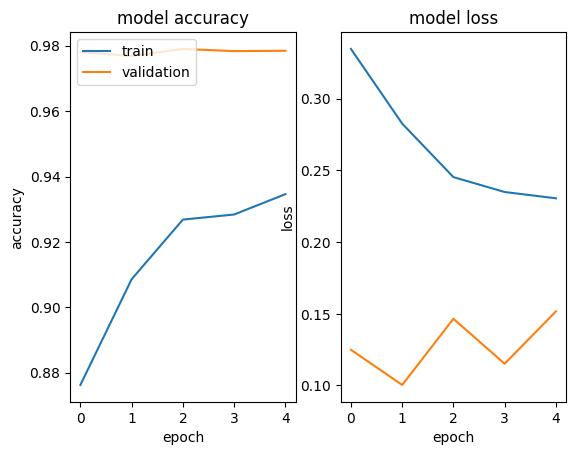

In [ ]:
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],
           loc='upper left')
plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
get_submission_file(y_preds)

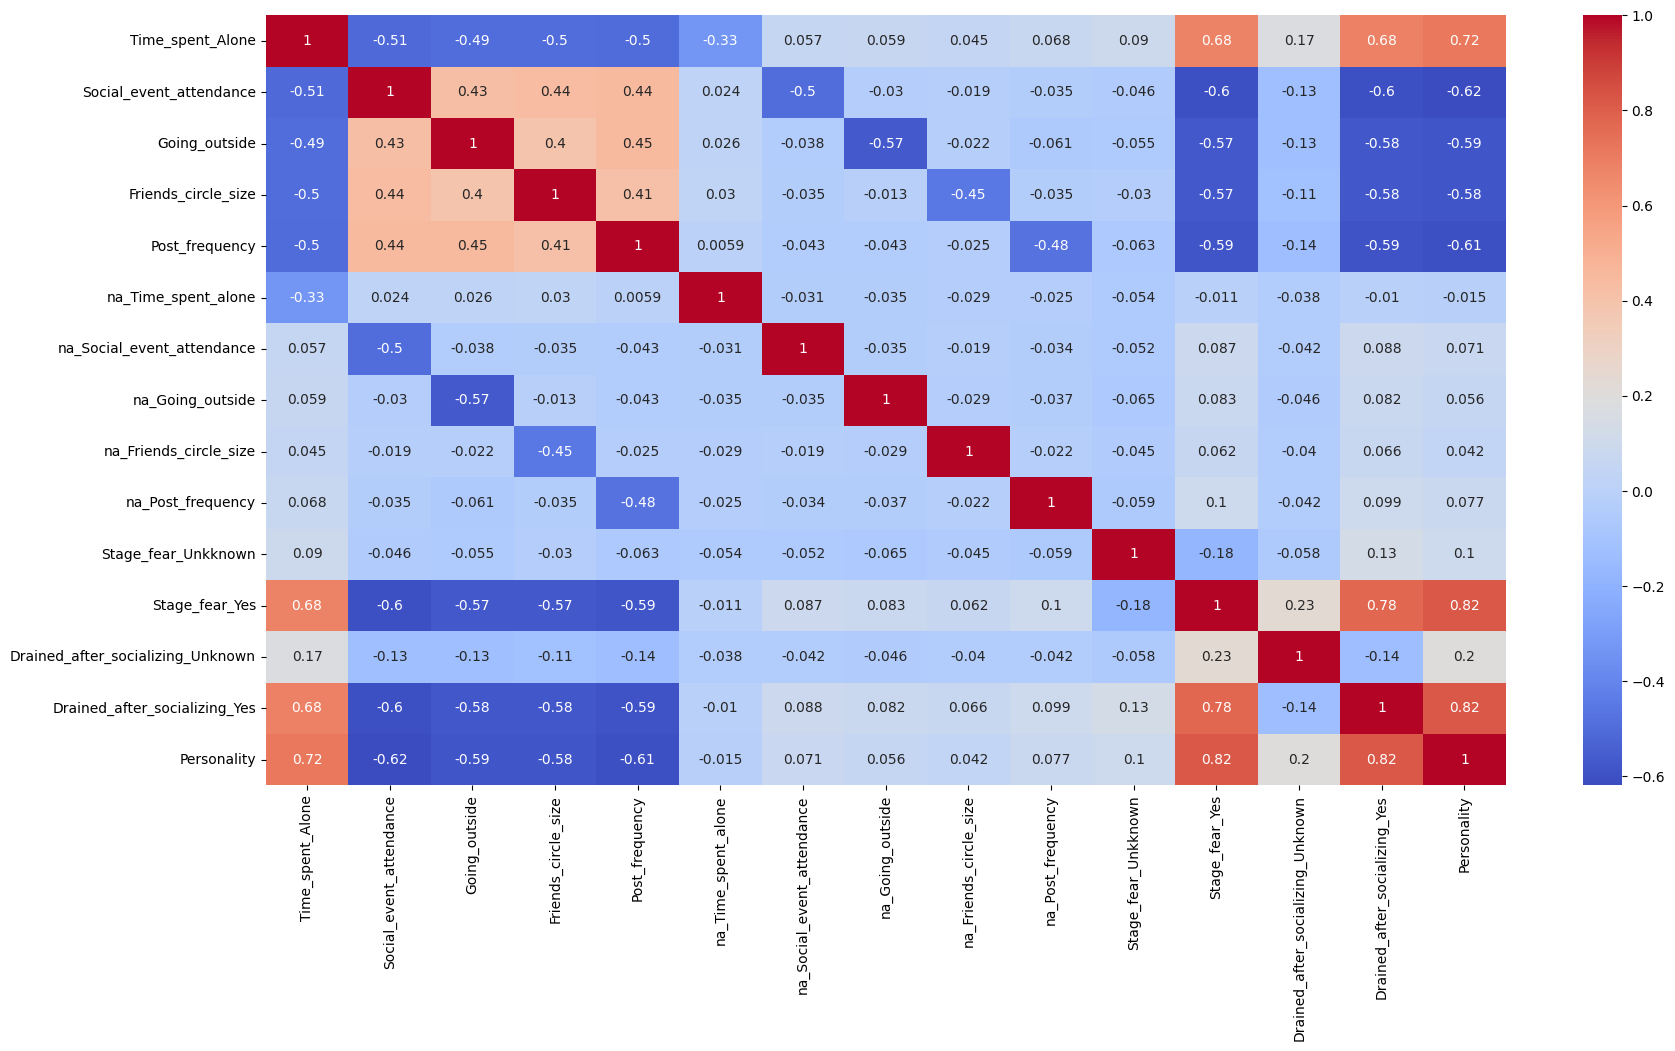

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm")
plt.show()

In [10]:
log_reg=LogisticRegression()
log_reg.fit(train.drop(columns=["Personality"]),
                       train['Personality'])

LogisticRegression()

In [11]:
preds=log_reg.predict(validation.drop(columns=["Personality"]))

In [15]:
print(classification_report(validation['Personality'],preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8874
           1       0.00      0.00      0.00         0

    accuracy                           0.98      8874
   macro avg       0.50      0.49      0.50      8874
weighted avg       1.00      0.98      0.99      8874



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
preds=log_reg.predict(test)

In [21]:
get_submission_file(preds)

In [23]:
dst=DecisionTreeClassifier()
dst.fit(train.drop(columns=["Personality"]),
                       train['Personality'])
preds=dst.predict(validation.drop(columns=["Personality"]))
print(classification_report(validation['Personality'],preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8874

    accuracy                           1.00      8874
   macro avg       1.00      1.00      1.00      8874
weighted avg       1.00      1.00      1.00      8874



In [25]:
preds=dst.predict(test)
get_submission_file(preds)

In [27]:
rf=RandomForestClassifier()
rf.fit(train.drop(columns=["Personality"]),
                       train['Personality'])
preds=rf.predict(validation.drop(columns=["Personality"]))
print(classification_report(validation['Personality'],preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8874

    accuracy                           1.00      8874
   macro avg       1.00      1.00      1.00      8874
weighted avg       1.00      1.00      1.00      8874



In [29]:
preds=rf.predict(test)
get_submission_file(preds)

In [31]:
svc=SVC()
svc.fit(train.drop(columns=["Personality"]),
                       train['Personality'])
preds=svc.predict(validation.drop(columns=["Personality"]))
print(classification_report(validation['Personality'],preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8874
           1       0.00      0.00      0.00         0

    accuracy                           0.98      8874
   macro avg       0.50      0.49      0.50      8874
weighted avg       1.00      0.98      0.99      8874



In [33]:
preds=svc.predict(test)
get_submission_file(preds)

In [35]:
log_grid_params={
    'C':np.logspace(-3,3,7),
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'class_weight':['balanced','None'],
    'max_iter':[100,200,300,600,1000],
    'random_state':[42],
    'n_jobs':[-1],
    'l1_ratio':np.linspace(0,1,10)
}

In [36]:
glr=GridSearchCV(log_reg,log_grid_params,cv=5)
glr.fit(
    train.drop(columns=["Personality"]),
    train['Personality']
)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'class_weight': ['balanced', 'None'],
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'max_iter': [100, 200, 300, 600, 1000], 'n_jobs': [-1],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'solver': ['liblinear']})

In [37]:
preds=glr.predict(validation.drop(columns=["Personality"]))
print(classification_report(validation['Personality'],preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8874
           1       0.00      0.00      0.00         0

    accuracy                           0.98      8874
   macro avg       0.50      0.49      0.50      8874
weighted avg       1.00      0.98      0.99      8874



In [38]:
preds=glr.predict(test)
get_submission_file(preds)

In [40]:
glr.best_params_

{'C': np.float64(0.1),
 'class_weight': 'balanced',
 'l1_ratio': np.float64(0.0),
 'max_iter': 100,
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

In [39]:
best_params=glr.best_params_

In [43]:
best_params

{'C': np.float64(0.1),
 'class_weight': 'balanced',
 'l1_ratio': np.float64(0.0),
 'max_iter': 100,
 'n_jobs': -1,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear'}

InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'elasticnet', 'l2'} or None. Got LogisticRegression(C=np.float64(0.1), class_weight='balanced',
                   l1_ratio=np.float64(0.0), n_jobs=-1, penalty='l1',
                   random_state=42, solver='liblinear') instead.

In [46]:
model=glr.best_estimator_

In [48]:
model.fit(
    train.drop(columns=["Personality"]),
    train['Personality'])

LogisticRegression(C=np.float64(0.1), class_weight='balanced',
                   l1_ratio=np.float64(0.0), n_jobs=-1, penalty='l1',
                   random_state=42, solver='liblinear')

In [50]:
preds=model.predict(validation.drop(columns=["Personality"]))
print(classification_report(validation['Personality'],preds))
preds=model.predict(test)
get_submission_file(preds)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8874
           1       0.00      0.00      0.00         0

    accuracy                           0.98      8874
   macro avg       0.50      0.49      0.50      8874
weighted avg       1.00      0.98      0.99      8874



# Start with begging,Voting